In [1]:
import sys
print(sys.prefix)

/central/groups/CS156b/2025/CodeMonkeys/myenv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
full_train_df = pd.read_csv('train2023.csv', low_memory=False)
full_train_df.columns.values[1] = "Id"
full_test_df = pd.read_csv('test_ids.csv')

In [4]:
print(full_train_df.head())

   Unnamed: 0.1  Id                                     Path     Sex  Age  \
0             0   0  train/pid50512/study1/view1_frontal.jpg  Female   68   
1             1   1  train/pid21580/study2/view1_frontal.jpg  Female   87   
2             2   2  train/pid21580/study1/view1_frontal.jpg  Female   83   
3             3   3  train/pid21580/study1/view2_lateral.jpg  Female   83   
4             4   4  train/pid33839/study1/view1_frontal.jpg    Male   41   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         1.0                         NaN           NaN   
1         Frontal    AP        -1.0                         NaN           0.0   
2         Frontal    AP        -1.0                         NaN           NaN   
3         Lateral   NaN        -1.0                         NaN           NaN   
4         Frontal    AP        -1.0                         NaN           NaN   

   Lung Opacity  Pneumonia  Pleural Effusion  Pleu

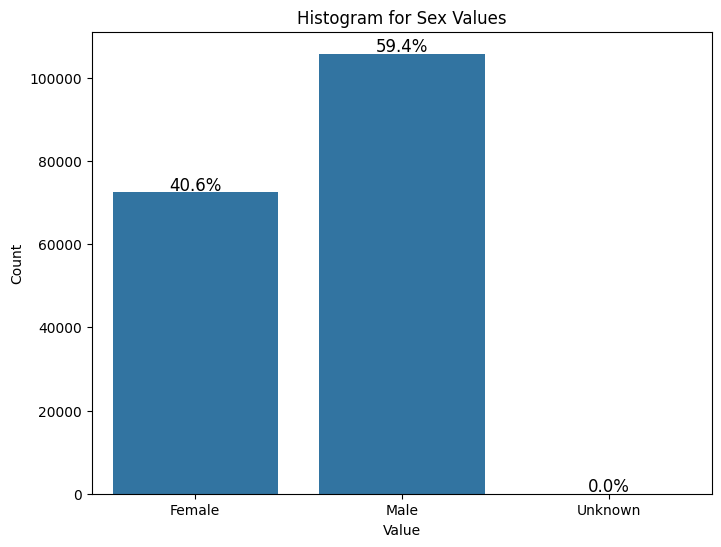

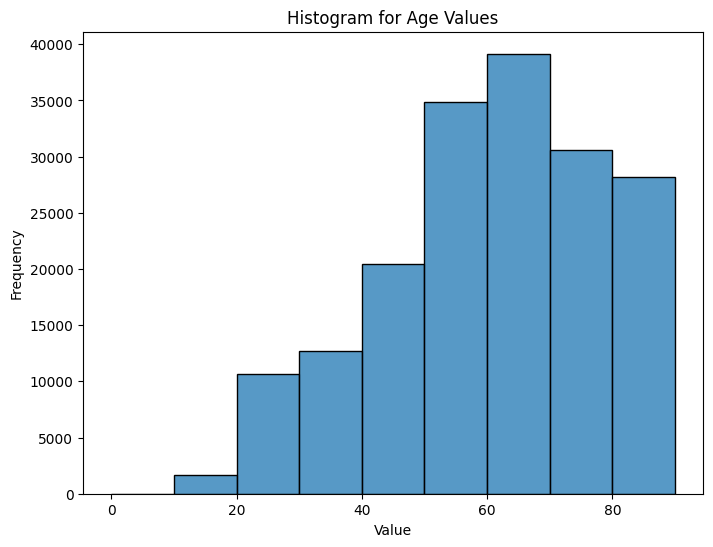

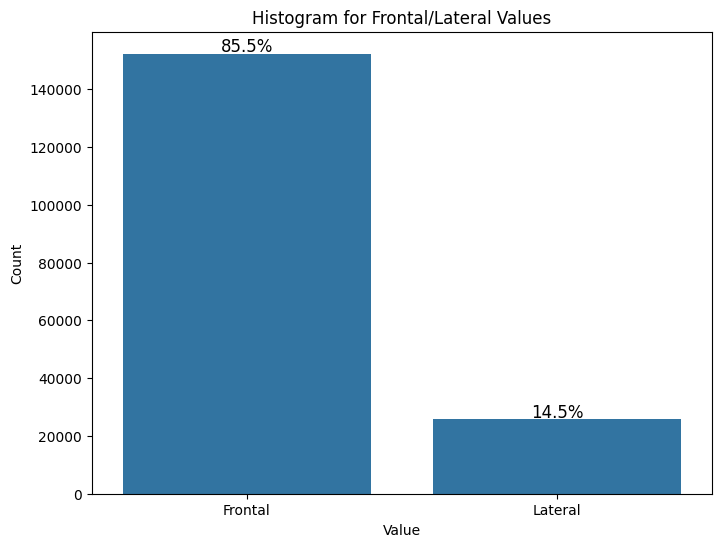

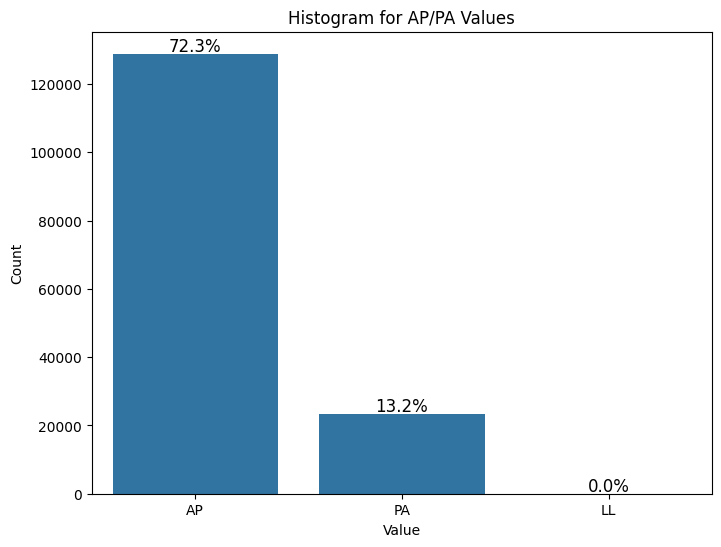

In [5]:
for column in full_train_df.columns[3: 7]:
    plt.figure(figsize=(8, 6))
    
    if full_train_df[column].dtype in ['float64', 'int64']:  # For numerical columns
        sns.histplot(full_train_df[column], bins = 9, kde=False)
        plt.title(f"Histogram for {column} Values")
        plt.xlabel("Value")
        plt.ylabel('Frequency')
    else:  # For categorical columns
        ax = sns.countplot(x=full_train_df[column])
        plt.title(f"Histogram for {column} Values")
        plt.xlabel("Value")
        plt.ylabel('Count')

        # Calculate the total number of entries in the column
        total_count = len(full_train_df[column])

        # Adding percentage labels on top of each bar
        for p in ax.patches:
            # Calculate the percentage for each bar
            percentage = 100 * p.get_height() / total_count
            ax.annotate(f'{percentage:.1f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        fontsize=12, color='black', 
                        xytext=(0, 5), textcoords='offset points')
    plt.show()

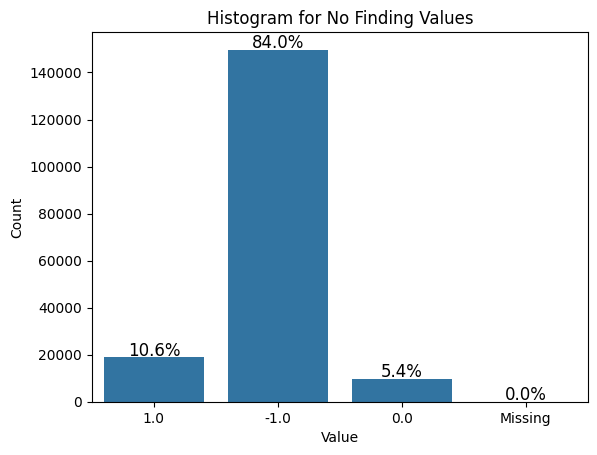

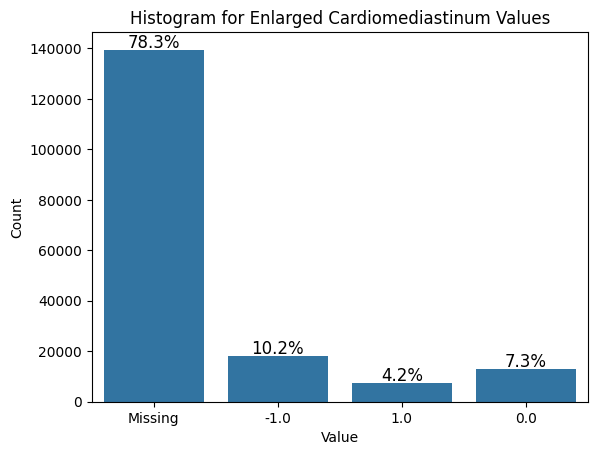

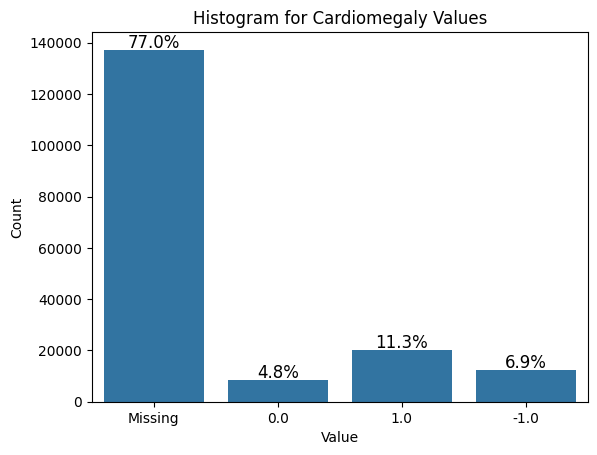

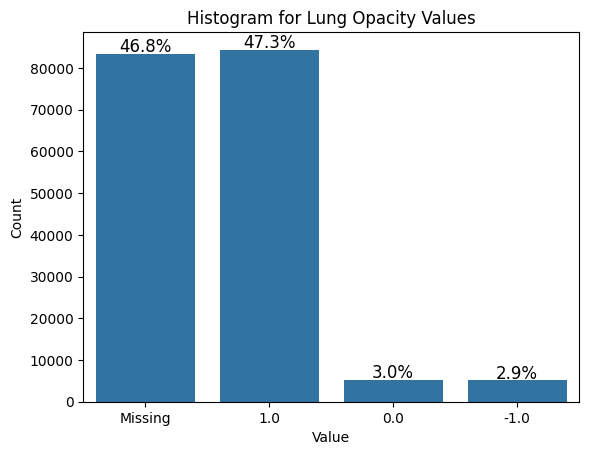

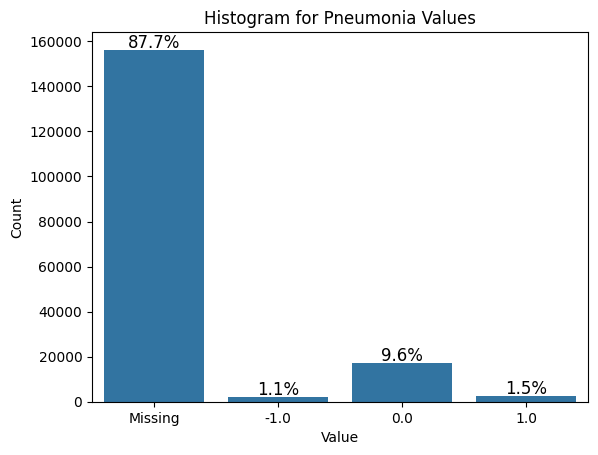

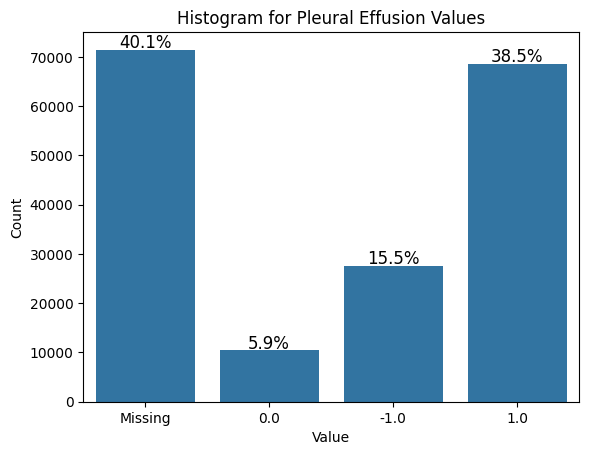

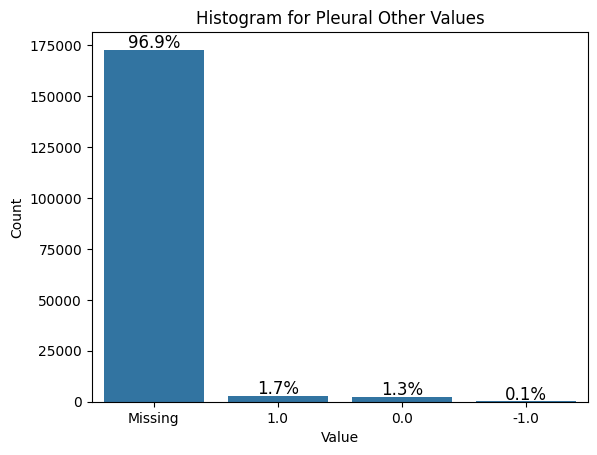

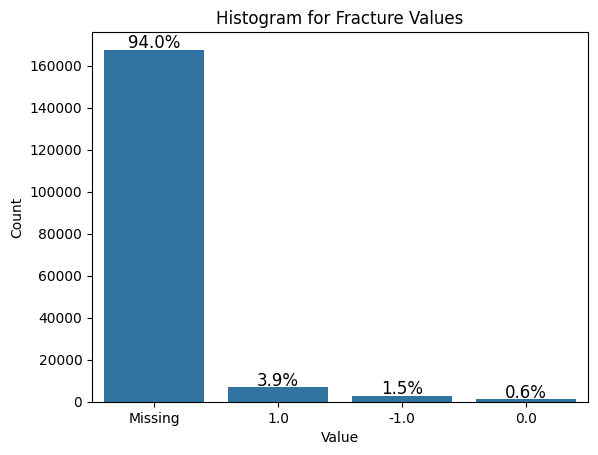

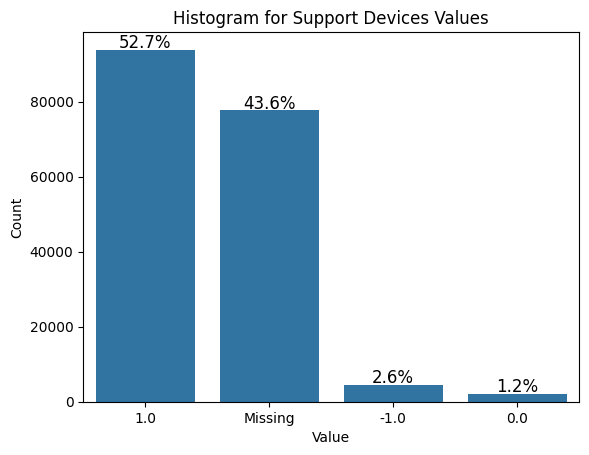

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in full_train_df.columns[7:16]:
    # Fill NaN values with a placeholder string
    data = full_train_df[column].fillna('Missing')

    ax = sns.countplot(x=data)
    plt.title(f"Histogram for {column} Values")
    plt.xlabel("Value")
    plt.ylabel("Count")

    # Calculate the total number of entries (including missing)
    total_count = len(data)

    # Adding percentage labels on top of each bar
    for p in ax.patches:
        percentage = 100 * p.get_height() / total_count
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')
    
    plt.show()

In [5]:
import torch
import torch.nn as nn
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from PIL import Image
import os

In [ ]:
class CSVDataset(Dataset):
    def __init__(self, dataframe, image_root_dir, target_columns=None, transform=None,
                 save_dir=None, use_saved_images=False):
        self.data = dataframe
        self.image_root_dir = image_root_dir
        self.target_columns = target_columns
        self.transform = transform
        self.save_dir = save_dir
        self.use_saved_images = use_saved_images

        if self.save_dir:
            os.makedirs(self.save_dir, exist_ok=True)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        original_image_path = os.path.join(self.image_root_dir, row['Path'])
        
        # Create saved image path with .pt extension using the index instead of image_filename
        saved_image_path = os.path.join(self.save_dir, f"{row['Id']}.pt")
        print(saved_image_path)
        
        # Load and transform image
        if self.use_saved_images and saved_image_path and os.path.exists(saved_image_path):
            # Load the saved tensor directly if already saved
            image_tensor = torch.load(saved_image_path)
        else:
            image = Image.open(original_image_path).convert("L")  # Convert image to grayscale
            image_tensor = self.transform(image) if self.transform else transforms.ToTensor()(image)

            # Save transformed image tensor as a .pt file if applicable
            if self.save_dir and not self.use_saved_images:
                # Save tensor directly as a .pt file
                torch.save(image_tensor, saved_image_path)

        # Handle multi-label targets with NaN -> 0
        if self.target_columns:
            # Ensure the target columns are numeric before fillna
            labels = pd.to_numeric(row[self.target_columns], errors='coerce').fillna(0)
            labels = labels.astype(float).values
            labels = torch.tensor(labels, dtype=torch.float32)
            return image_tensor, labels
        
        return image_tensor

In [17]:
print(len(full_train_df))
sixth = len(full_train_df) // 6
print(sixth)
df_arr = []

print(len(full_test_df))
twelfth = len(full_test_df) // 12
print(twelfth)
df_arr_test = []

start = 0
for i in range(6):
    df_arr.append(full_train_df.iloc[start:start + sixth, :])
    start += sixth
#print(df_arr[5])

start = 0
for i in range(12):
    df_arr_test.append(full_test_df.iloc[start:start + twelfth, :])
    start += twelfth
print(df_arr_test[11])

178158
29693
22596
1883
           Id                                    Path
20713  204024  test/pid57096/study1/view1_frontal.jpg
20714  204025  test/pid57096/study2/view1_frontal.jpg
20715  204028  test/pid54675/study1/view1_frontal.jpg
20716  204057  test/pid56311/study1/view1_frontal.jpg
20717  204063  test/pid53784/study5/view1_frontal.jpg
...       ...                                     ...
22591  223392  test/pid56630/study1/view1_frontal.jpg
22592  223394  test/pid51910/study1/view1_frontal.jpg
22593  223401  test/pid57867/study1/view1_frontal.jpg
22594  223403  test/pid55717/study1/view1_frontal.jpg
22595  223404  test/pid55717/study2/view1_frontal.jpg

[1883 rows x 2 columns]


In [ ]:
# Create dataset
train_dataset = CSVDataset(
    dataframe=full_train_df, 
    image_root_dir=image_root, 
    target_columns=["No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity",
    "Pneumonia", "Pleural Effusion", "Pleural Other", "Fracture", "Support Devices"], 
    transform=image_transforms,  # Pass the transform
    save_dir=train_save_dir, 
    use_saved_images=False  # Set to True if you want to load tensors from CSV
)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Iterate through batches
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    # Do your training here

./input_images/train/218482.pt
./input_images/train/190769.pt
./input_images/train/146990.pt
./input_images/train/208976.pt
./input_images/train/196518.pt
./input_images/train/2525.pt
./input_images/train/165596.pt
./input_images/train/151635.pt
./input_images/train/196459.pt
./input_images/train/151524.pt
./input_images/train/183365.pt
./input_images/train/143581.pt
./input_images/train/28288.pt
./input_images/train/118408.pt
./input_images/train/209256.pt
./input_images/train/168992.pt
./input_images/train/92366.pt
./input_images/train/61859.pt
./input_images/train/69994.pt
./input_images/train/88993.pt
./input_images/train/154670.pt
./input_images/train/209408.pt
./input_images/train/210780.pt
./input_images/train/13158.pt
./input_images/train/128622.pt
./input_images/train/145340.pt
./input_images/train/57556.pt
./input_images/train/175325.pt
./input_images/train/60512.pt
./input_images/train/128468.pt
./input_images/train/74322.pt
./input_images/train/156101.pt
Batch 1
Images shap

In [78]:
# Create dataset
test_dataset = CSVDataset(
    dataframe=df_first10rows_test, 
    image_root_dir=image_root, 
    target_columns=None, 
    transform=image_transforms,  # Pass the transform
    save_dir=test_save_dir, 
    use_saved_images=False  # Set to True if you want to load tensors from CSV
)

# Create DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Iterate through batches
for batch_idx, (images) in enumerate(test_loader):
    print(f"Batch {batch_idx + 1}")
    print("Images shape:", images.shape)

./input_images/test/19.pt
./input_images/test/105.pt
./input_images/test/104.pt
./input_images/test/45.pt
./input_images/test/102.pt
./input_images/test/106.pt
./input_images/test/44.pt
./input_images/test/18.pt
./input_images/test/107.pt
./input_images/test/57.pt
Batch 1
Images shape: torch.Size([10, 1, 224, 224])


In [10]:
class MultiLabelResNet50(nn.Module):
    def __init__(self, num_classes):
        super(MultiLabelResNet50, self).__init__()
        self.base_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
        self.base_model.fc = nn.Sequential(
            nn.Linear(self.base_model.fc.in_features, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.base_model(x)